In [55]:
# U=European Centre for Disease Control
import pandas as pd
import requests
import matplotlib.pyplot as plt

df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

In [56]:
for country in df['countriesAndTerritories'].unique():
    print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua_and_Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire, Saint Eustatius and Saba
Bosnia_and_Herzegovina
Botswana
Brazil
British_Virgin_Islands
Brunei_Darussalam
Bulgaria
Burkina_Faso
Burundi
Cambodia
Cameroon
Canada
Cape_Verde
Cases_on_an_international_conveyance_Japan
Cayman_Islands
Central_African_Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa_Rica
Cote_dIvoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
Democratic_Republic_of_the_Congo
Denmark
Djibouti
Dominica
Dominican_Republic
Ecuador
Egypt
El_Salvador
Equatorial_Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland_Islands_(Malvinas)
Faroe_Islands
Fiji
Finland
France
French_Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guernsey
Guinea
Guinea_Bissau
Guyana
Haiti
Holy_See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
I

In [106]:
def get_country(country = 'United_Kingdom'):
    df1 = df.loc[df['countriesAndTerritories'] == country][['countriesAndTerritories', 'dateRep', 'cases', 'deaths']]
    #df1['dateRep'] = pd.to_datetime(df['dateRep'])
    df1['dateRep'] = df1.apply(lambda row: pd.to_datetime(row['dateRep'], dayfirst = True), axis=1)
    df1.sort_values(by = 'dateRep', inplace = True)
    df1['cases'] = df1['cases'].apply(lambda x: x if x > 0 else 0 )
    df1['cases_7_days'] = df1.iloc[:,2].rolling(window=7).mean()
    df1['deaths'] = df1['deaths'].apply(lambda x: x if x > 0 else 0 )
    df1['deaths_7_days'] = df1.iloc[:,3].rolling(window=7).mean()
    return df1
df1 = get_country('Germany')
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days
18854,Germany,2019-12-31,0,0,NaN,NaN
18853,Germany,2020-01-01,0,0,NaN,NaN
18852,Germany,2020-01-02,0,0,NaN,NaN
18851,Germany,2020-01-03,0,0,NaN,NaN
18850,Germany,2020-01-04,0,0,NaN,NaN
...,...,...,...,...,...,...
18554,Germany,2020-10-26,8685,24,10223.857143,38.142857
18553,Germany,2020-10-27,11409,42,10872.571429,37.428571
18552,Germany,2020-10-28,14964,85,11925.285714,44.000000
18551,Germany,2020-10-29,16774,89,12709.142857,52.428571


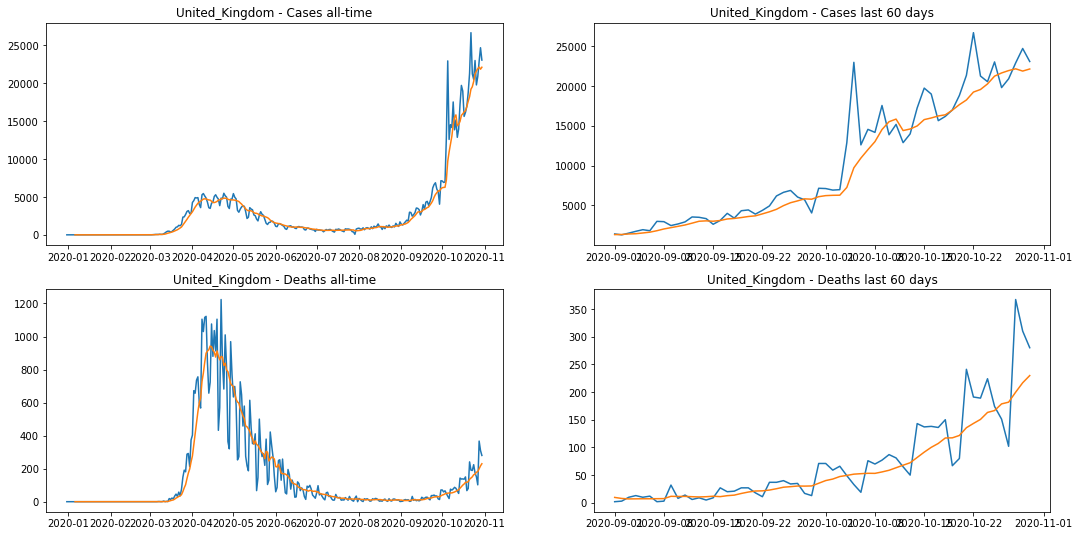

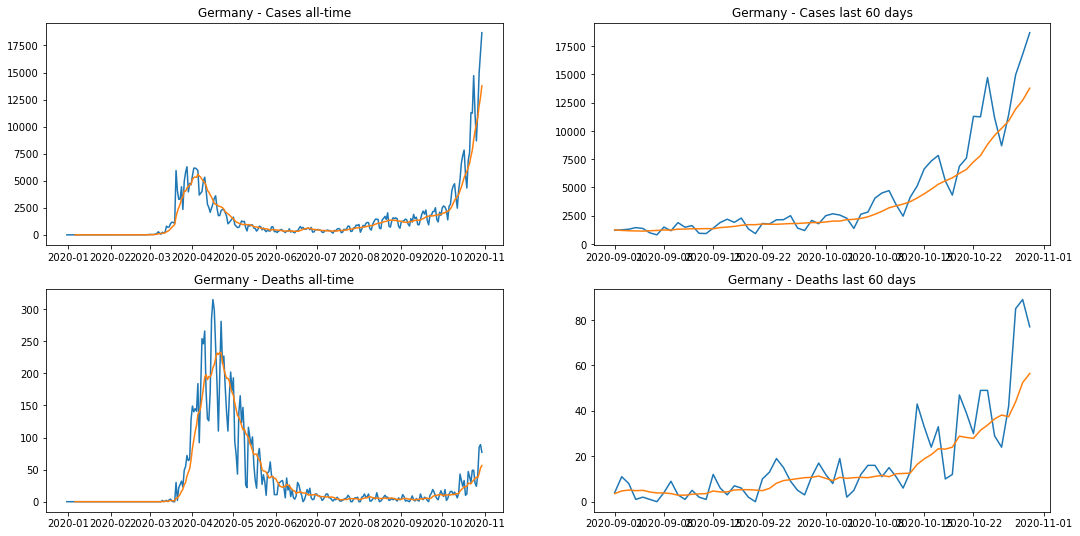

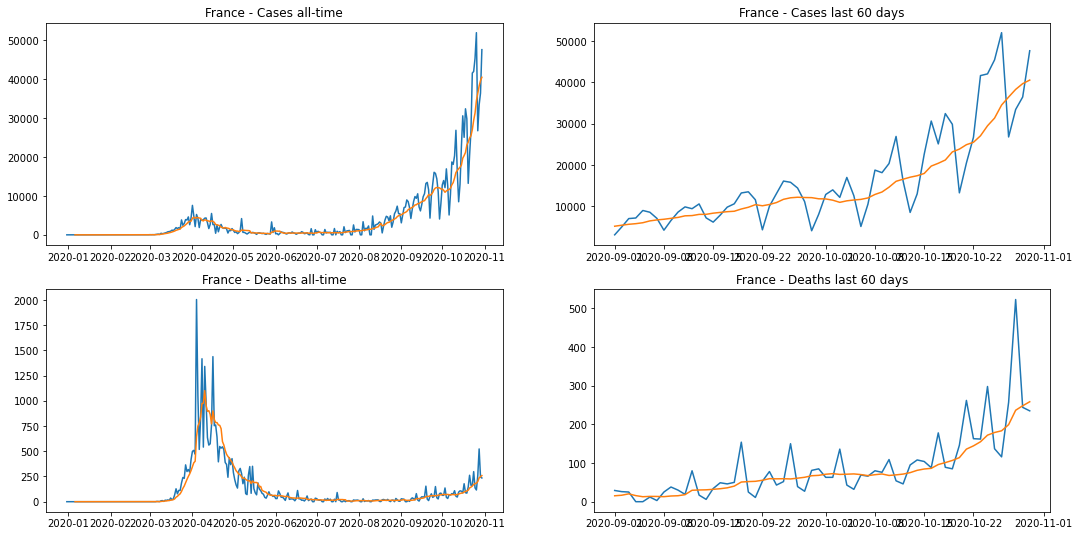

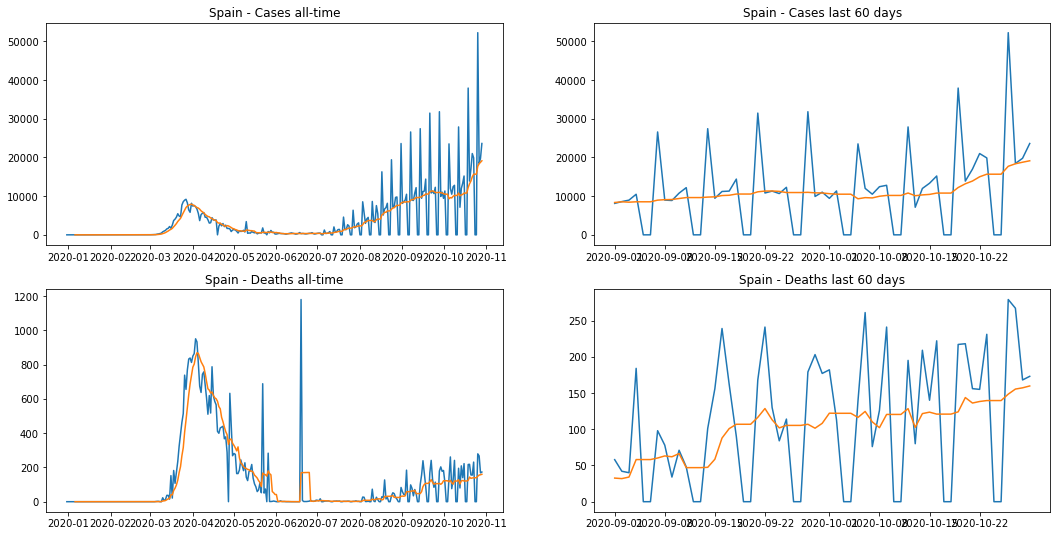

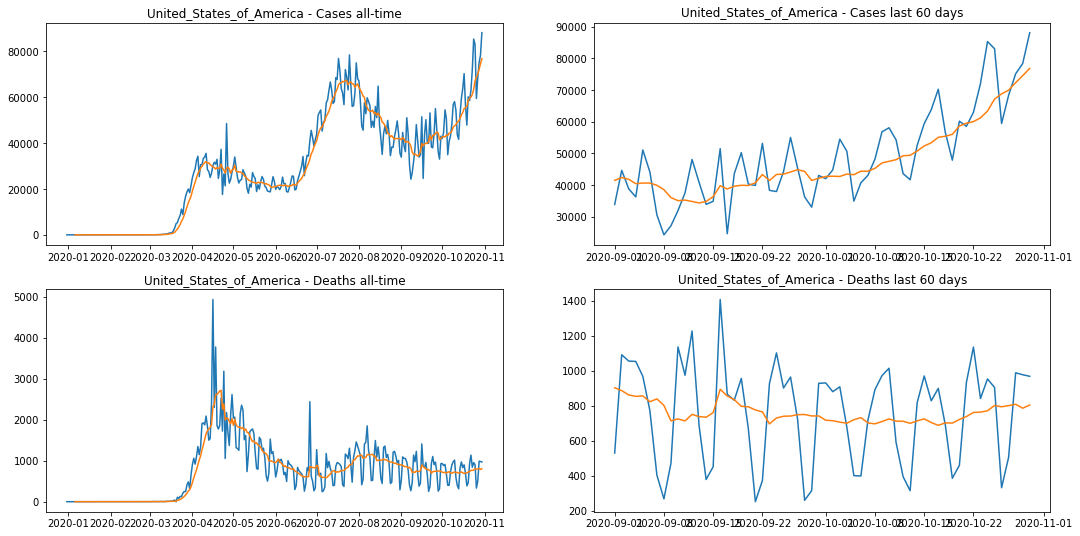

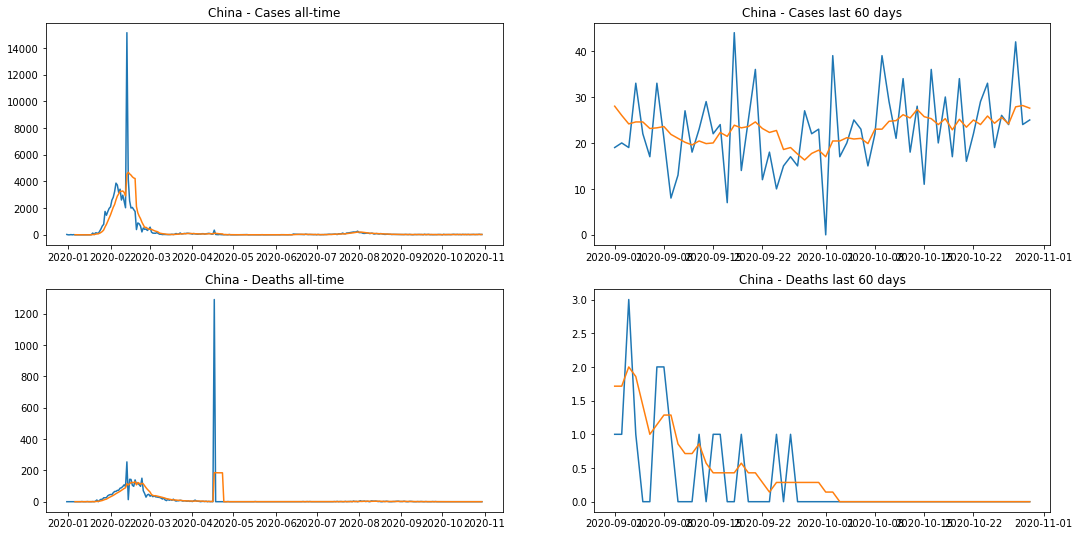

In [141]:
for country in ['United_Kingdom', 'Germany', 'France', 'Spain', 'United_States_of_America', 'China']:

    df1 = get_country(country)
    plt.rcParams["figure.figsize"] = (18,9)
    fig , ax = plt.subplots(2,2)

    plt.subplot(221)
    plt.plot('dateRep', 'cases', data=df1)
    plt.plot('dateRep', 'cases_7_days', data=df1)
    plt.title('{} - Cases all-time'.format(country))

    plt.subplot(223)
    plt.plot('dateRep', 'deaths', data=df1)
    plt.plot('dateRep', 'deaths_7_days', data=df1)
    plt.title('{} - Deaths all-time'.format(country))
    
    df1 = df1.loc[df1['dateRep'] > pd.to_datetime('today') - pd.offsets.DateOffset(days=60)]
    plt.subplot(222)
    plt.plot('dateRep', 'cases', data=df1)
    plt.plot('dateRep', 'cases_7_days', data=df1)
    plt.title('{} - Cases last 60 days'.format(country))

    plt.subplot(224)
    plt.plot('dateRep', 'deaths', data=df1)
    plt.plot('dateRep', 'deaths_7_days', data=df1)
    plt.title('{} - Deaths last 60 days'.format(country))
    
    plt.show()
    
    fig.savefig('{}.png'.format(country))

In [100]:
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days
10557,China,2019-12-31,27,0,NaN,NaN
10556,China,2020-01-01,0,0,NaN,NaN
10555,China,2020-01-02,0,0,NaN,NaN
10554,China,2020-01-03,17,0,NaN,NaN
10553,China,2020-01-04,0,0,NaN,NaN
...,...,...,...,...,...,...
10257,China,2020-10-26,26,0,25.571429,0.0
10256,China,2020-10-27,24,0,24.142857,0.0
10255,China,2020-10-28,42,0,27.857143,0.0
10254,China,2020-10-29,24,0,28.142857,0.0


In [103]:
df1['deaths'].apply(lambda x: print(x) )

0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
3
11
0
9
15
15
25
25
26
38
43
46
45
57
65
66
72
73
86
89
97
108
97
254
13
143
142
105
98
139
112
118
109
98
150
70
52
29
44
47
35
42
32
37
31
30
28
27
23
17
22
11
7
15
9
13
9
16
8
4
6
6
9
7
4
6
5
3
5
2
3
1
6
10
4
3
2
0
2
2
1
3
0
2
0
1
0
1290
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
1
1
0
0
2
0
1
1
2
0
4
1
2
0
2
6
2
3
4
1
3
1
0
5
4
3
4
3
1
2
0
0
2
1
3
2
0
0
0
1
1
2
3
3
1
1
1
3
1
0
0
2
2
1
0
0
0
1
0
1
1
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


10557    None
10556    None
10555    None
10554    None
10553    None
         ... 
10257    None
10256    None
10255    None
10254    None
10253    None
Name: deaths, Length: 305, dtype: object

In [108]:
df1

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days
10557,China,2019-12-31,27,0,NaN,NaN
10556,China,2020-01-01,0,0,NaN,NaN
10555,China,2020-01-02,0,0,NaN,NaN
10554,China,2020-01-03,17,0,NaN,NaN
10553,China,2020-01-04,0,0,NaN,NaN
...,...,...,...,...,...,...
10257,China,2020-10-26,26,0,25.571429,0.0
10256,China,2020-10-27,24,0,24.142857,0.0
10255,China,2020-10-28,42,0,27.857143,0.0
10254,China,2020-10-29,24,0,28.142857,0.0


In [117]:
df1.loc[df1['dateRep'] > pd.to_datetime('today') - pd.offsets.DateOffset(days=60)]

,countriesAndTerritories,dateRep,cases,deaths,cases_7_days,deaths_7_days
10312,China,2020-09-01,19,1,28.000000,1.714286
10311,China,2020-09-02,20,1,26.000000,1.714286
10310,China,2020-09-03,19,3,24.142857,2.000000
10309,China,2020-09-04,33,1,24.571429,1.857143
10308,China,2020-09-05,22,0,24.571429,1.428571
10307,China,2020-09-06,17,0,23.142857,1.000000
10306,China,2020-09-07,33,2,23.285714,1.142857
10305,China,2020-09-08,21,2,23.571429,1.285714
10304,China,2020-09-09,8,1,21.857143,1.285714
10303,China,2020-09-10,13,0,21.000000,0.857143


In [113]:
pd.offsets.DateOffset(days=60)

<DateOffset: days=60>

In [116]:
pd.to_datetime('today') - pd.offsets.DateOffset(days=60)

Timestamp('2020-08-31 16:52:20.529668')